# Exercise 7.1

Write the tensor product $I\otimes\tau_x$ as a matrix and apply that matrix to each of the spin operator column vectors.

$I\otimes\tau_x = \begin{pmatrix} 1 & 0 \\ 0 & 1\end{pmatrix} \otimes \begin{pmatrix} 0 & 1 \\1 & 0 \end{pmatrix} = \begin{pmatrix} 0 & 1&0&0\\1&0&0&0\\0&0&0&1\\0&0&1&0\end{pmatrix}$

$I\otimes\tau_x |uu\rangle = \begin{pmatrix} 0 & 1&0&0\\1&0&0&0\\0&0&0&1\\0&0&1&0\end{pmatrix} \begin{pmatrix}1\\0\\0\\0\end{pmatrix} = \begin{pmatrix} 0\\1\\0\\0\end{pmatrix} = |ud\rangle$

Okay I did one... now for Python

In [1]:
from utils import *

operator = tensor(qeye(2), sigmax())
enc = {0: 'u', 1: 'd'}

for a,b in itertools.product([1,0],[0,1]):

    state = tensor(basis(2,a), basis(2,b))
    result = operator*state

    lprint(f'I\otimes\\tau_x|{enc[a]}{enc[b]}\\rangle = ' + numpy_array_to_latex(result))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Exercise 7.2

Calculate the matrix of elements of $\sigma_z\otimes\tau_x$ by forming inner products.

$\sigma_z\otimes\tau_x = \begin{pmatrix} \langle00|\sigma_z\tau_x|00\rangle & \langle00|\sigma_z\tau_x|01\rangle & \langle00|\sigma_z\tau_x|10\rangle & \langle00|\sigma_z\tau_x|11\rangle \\ \langle01|\sigma_z\tau_x|00\rangle & \langle01|\sigma_z\tau_x|01\rangle & \langle01|\sigma_z\tau_x|10\rangle & \langle01|\sigma_z\tau_x|11\rangle \\\langle10|\sigma_z\tau_x|00\rangle & \langle10|\sigma_z\tau_x|01\rangle & \langle10|\sigma_z\tau_x|10\rangle & \langle10|\sigma_z\tau_x|11\rangle \\\langle11|\sigma_z\tau_x|00\rangle & \langle11|\sigma_z\tau_x|01\rangle & \langle11|\sigma_z\tau_x|10\rangle & \langle11|\sigma_z\tau_x|11\rangle\end{pmatrix} = \begin{pmatrix}0 & 1 & 0 & 0\\1 & 0 & 0 & 0\\0 & 0 & 0 & -1\\0 & 0 & -1 & 0 \end{pmatrix}$

# Exercise 7.3

In [2]:
# a)
n,m = 2,2

# note that generating a Matrix full of symbols is different than the easier MatrixSymbol objects
B = Matrix([[symbols(f'b{i}{j}') for j in range(1, n+1)] for i in range(1, m+1)])
A = Matrix([[symbols(f'a{i}{j}') for j in range(1, n+1)] for i in range(1, m+1)])
a = Matrix([symbols(f'a{i}{1}') for i in range(1, n+1)])
b = Matrix([symbols(f'b{i}{1}') for i in range(1, n+1)])

def k_prod(X, Y):
    # Symbolic Kronecker product
    return Matrix([[x * Y for x in row] for row in X.tolist()])

# b)
lprint('Aa = ' + latex(A*a))
lprint('Bb = ' + latex(B*b))

# c) & d)
lprint(f'a\otimes b = ' + latex(k_prod(a,b)))
lprint(f'A\otimes B = ' + latex(k_prod(A,B)))
lprint(f'Aa\otimes Bb = ' + latex(k_prod(A*a,B*b).applyfunc(expand)))

# e)
lprint(f'(A\otimes B) (a\otimes b) = ' + latex(k_prod(A,B)*k_prod(a,b)))

# f)
assert k_prod(A,B)*k_prod(a,b) == k_prod(A*a, B*b).applyfunc(expand)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Exercise 7.4

Calculate the density matrix for $|\Psi\rangle = \alpha|u\rangle + \beta|d\rangle$

The density matrix is given by:

$ \rho_{aa'} = \psi^*(a)\psi(a) = |\Psi\rangle\langle\Psi| = \sum_i \rho_i|\Psi_i\rangle\langle\Psi_i|$

$\implies \rho_{aa'} = \alpha^*\alpha|u\rangle\langle u| + \beta^*\beta|d\rangle \langle d| + \alpha^*\beta|u\rangle\langle d| + \beta^*\alpha|d\rangle\langle u| =\begin{pmatrix} \alpha^*\alpha & \alpha^*\beta \\ \beta^*\alpha & \beta^*\beta \end{pmatrix}$

In [3]:
alpha, beta = .8,.2 #1/(np.sqrt(2)), 1/(np.sqrt(2))

state = (alpha*basis(2,0) + beta*basis(2,1)).unit()

rho = ket2dm(state)
rho

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.94117647 0.23529412]
 [0.23529412 0.05882353]]

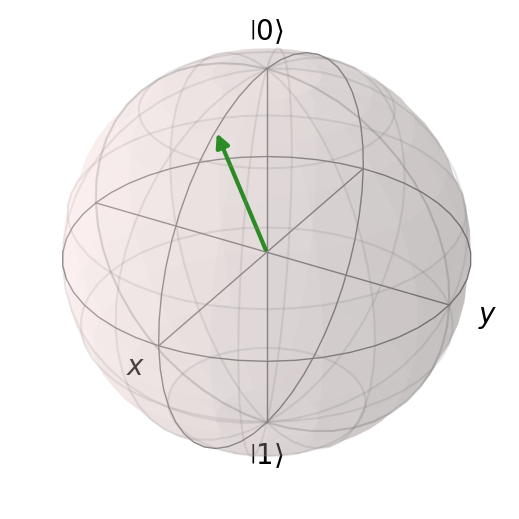

In [4]:
# we can visualize the superposition of the spin state - coefficients of 1/sqrt(2) would yield a spin along the x axis (in expectation)
b = Bloch()
b.add_states(state)
b.show()

# Exercise 7.5

a) Show that $\begin{pmatrix} a & 0 \\ 0 & b \end{pmatrix}^2 = \begin{pmatrix} a^2 & 0 \\ 0 & b^2 \end{pmatrix}$

This is an elementary operation of diagonal matrices:

In [5]:
A = Matrix([[symbols('a'), 0],[0, symbols('b')]])
A**2 == A*A

lprint(f'A^2 = ' + latex(A**2))

<IPython.core.display.Math object>

b) Now, suppose $ \rho = \begin{pmatrix} \frac{1}{3} & 0 \\ 0 & \frac{2}{3} \end{pmatrix}$, calculate $\rho^2$, $Tr(\rho)$, and $Tr(\rho^2)$

In [6]:
rho = np.array([[1/3, 0],[0, 2/3]])

lprint('\\rho^2 = ' + numpy_array_to_latex((rho**2).round(3)))

lprint('Tr(\\rho) = ' + str(rho.trace()))

lprint(f'Tr(\\rho^2) = {(rho**2).trace():.2f}')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

This is a mixed state, as there are no 1's on the diagnoals of $\rho$

# Exercise 7.6

Show that, if $\rho$ is a density matrix, then $Tr(\rho) = 1$

The law of total probability defines that $p(a) + p(\neg a) = 1$ or $\sum_a p(a) = 1$. The $Tr(\rho)$ is the sum over all possibilities of $a$ and therefore must sum to one.

Another way to look at this, since we know that a state vector must be unit normalized, $p(a) = \rho_{aa}$ where $\rho_{aa} = |a\rangle\langle a|$. $\rho$ must also be unit normalized.

# Exercise 7.7

In [7]:
rho = np.eye(2)*0.5

lprint(f'\\rho^2 = {numpy_array_to_latex(rho**2)}')

<IPython.core.display.Math object>

We know this represents an entagnled state because $\rho^2 \neq \rho$

# Exercise 7.8

Calculate the desnity matrices for the following states and check their properties:

In [91]:
S1 = (1/2)*(tensor(basis(2,0), basis(2,0)) + tensor(basis(2,0), basis(2,1)) + tensor(basis(2,1), basis(2,0)) + tensor(basis(2,1), basis(2,1)))
S2 = (1/np.sqrt(2))*(tensor(basis(2,0), basis(2,0)) + tensor(basis(2,1), basis(2,1)))
S3 = (1/5)*(3*tensor(basis(2,0), basis(2,0)) + 4*tensor(basis(2,0), basis(2,1)))

for i, S in enumerate((S1,S2,S3)):

    # Finding the density matrix of the entire system
    rho = ket2dm(S)

    # using partial trace to isolate Alice's sub-system (index 1 to "trace out" the second subsystem)
    rho = np.array(rho.ptrace(1)).round(2)

    lprint(f'|\psi_{i+1}\\rangle = {numpy_array_to_latex(rho)}')

    # rho is Hermitian
    assert np.array_equal(rho.conj().T, rho)

    # rho squared test for entanglement
    if np.array_equal(rho@rho, rho):
        lprint(f'\\rho_{i+1}^2 = \\rho_{i+1} \implies Pure State')

    else:
        lprint(f'\\rho_{i+1}^2 \\neq \\rho_{i+1} \implies Mixed State')

    # all eigenvalues of rho are in [0,1]
    eigenvalues = np.linalg.eigvals(rho)
    assert np.all(np.abs(eigenvalues-1) <= 1) & np.all(np.abs(eigenvalues-1) >= 0)



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Exercise 7.9

Given Alice's observable, A, and Bob's observable, B, show that, for a product state, the correlation, C(A,B) is zero

$ \langle A \rangle = \langle a|A|a\rangle$ and $ \langle B \rangle = \langle b|B|b\rangle$

$ \langle AB \rangle = \langle ab|AB|ab\rangle = \langle ab|(A\otimes I)(I\otimes B)|ab\rangle$

$= (\langle a|A |a\rangle) \otimes (\langle b| B|b\rangle)$

$ =  \langle A \rangle \langle B \rangle $

$\implies C(A,B) = \langle AB \rangle - \langle A\rangle\langle B\rangle = 0$

$\square$

In [17]:
# basic, unit superposition
a = (basis(2,0) + basis(2,1)).unit()
b = (basis(2,0) + basis(2,1)).unit()

# the product state
ab = tensor(a,b)

# any random observables, normalized
A = Qobj(np.random.rand(2, 2)).unit()
B = Qobj(np.random.rand(2, 2)).unit()

# Compute expectations using eq 7.21 (developed)
exp_A = (ket2dm(a) * A).tr()
exp_B = (ket2dm(b) * B).tr()
exp_AB = (ket2dm(ab) * tensor(A, B)).tr()

# Calculate correlation
lprint(f'C(A,B) = {exp_AB - exp_A * exp_B:.2f}')

# alternatively, we can use QuTip functions
lprint(f'C(A,B) = {expect(tensor(A,B), ab) - expect(A, a)*expect(B, b)}')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Exercise 7.10

Verify that $ \alpha_u|u,b\rangle +\alpha_d|d,b\rangle $ is a completely unentangled state.

To do this, we will find the eignevalues of the density matrix, and verify that the only non-zero eigenvalue is a 1, indicating a product state. I don't know that this is correct, but given the context of the question in the chapter, this seems like an obvious approach.

In [15]:
# representing the blank state simply as the Up basis vector
S = (tensor(basis(2,0), basis(2,0)) + tensor(basis(2,1), basis(2,0))).unit()

rho = ket2dm(S)

lprint(f'\lambda = {numpy_array_to_latex(np.array(rho.eigenenergies()).round(2))}')

<IPython.core.display.Math object>

# Exercise 7.11

Calculate Alice's density matrix for $\sigma_z$ for the "near-singlet" state.

In [89]:
a = np.sqrt(0.4)*tensor(basis(2,0), basis(2,1))
b = np.sqrt(0.6)*tensor(basis(2,1), basis(2,0))
ab = a - b

lprint(f'\\rho_a = {latex(Matrix(ket2dm(ab).ptrace(1)))}')

<IPython.core.display.Math object>

# Exercise 7.12